# LINEAR REGRESSION MODEL FROM SCRATCH


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [4]:
data = pd.read_csv("data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

### DATA PROCESSING

In [8]:
data = data.dropna()
print("Shape of the data:", data.shape)

Shape of the data: (699, 2)


### SPLITTING DATA

In [11]:
## training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.x[0:500]).reshape(500,1)

## validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:699]).reshape(199,1)

In [14]:
print(f"training data shape = {train_input.shape}")
print(f"training data shape = {train_input.shape}")
print(f"testing data shape = {test_input.shape}")
print(f"testing data shape = {test_input.shape}")

training data shape = (500, 1)
training data shape = (500, 1)
testing data shape = (199, 1)
testing data shape = (199, 1)


# <font color = "lightblue">LINEAR REGRESSION</font>

## Forward Propagation

In [17]:
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = np.multiply(m, train_input) + c
    return predictions

## Cost function

In [16]:
def cost_function(predictions,train_output):
    cost = np.mean((train_output - predictions)**2)*0.5
    return cost

## Gradient Descent for Back Propagation

df = summation(f(x) - y)/n

dm = df*x

dc = df*1



In [15]:
def backward_propagation(train_input, train_output, predictions):

    derivatives = dict()

    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives["dm"] = dm
    derivatives["dc"] = dc

    return derivatives


## Update Parameters

m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [18]:
def update_parameters(parameters, derivatives, learning_rate):

    parameters["m"] = parameters["m"] - learning_rate * derivatives['dm']
    parameters["c"] = parameters["c"] - learning_rate * derivatives['dc']

    return parameters

## Model Training

In [20]:
def train(train_input, train_output, learning_rate, iters):

    # random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()

    # loss
    loss = list()
    
    # iteration
    for i in range(iters):
        
        # forward propagation
        predictions = forward_propagation(train_input, parameters)

        # cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")

        #plot
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "+", label = "Training")

        legend = ax.legend()

        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, train_output, "+", label = "Training")
        plt.show()

        # back propagation 
        derivatives = backward_propagation(train_input, train_output, predictions)

        # update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters

## Training

Iteration = 1, Loss = 643.1916502106185


<Figure size 640x480 with 0 Axes>

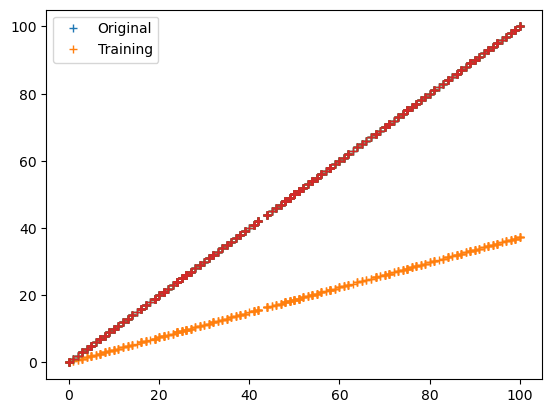

Iteration = 2, Loss = 291.8167791931989


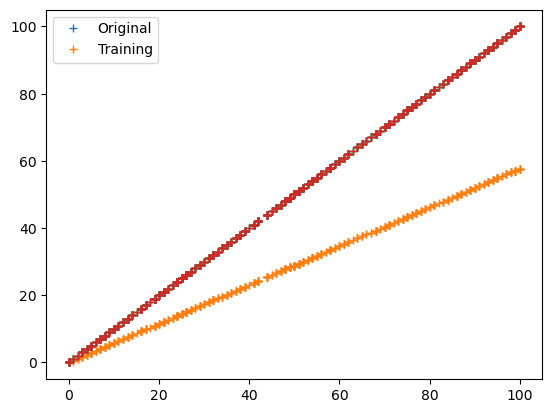

Iteration = 3, Loss = 132.39761101454786


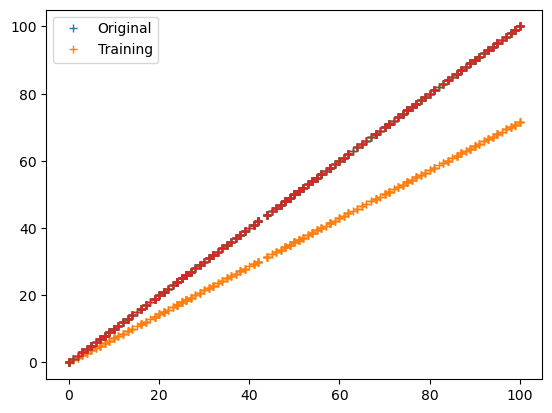

Iteration = 4, Loss = 60.06895783189393


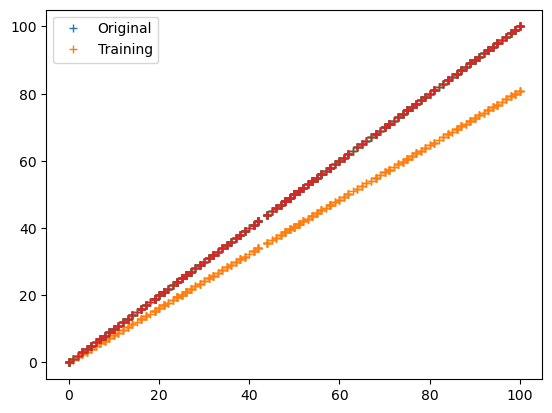

Iteration = 5, Loss = 27.253367767967756


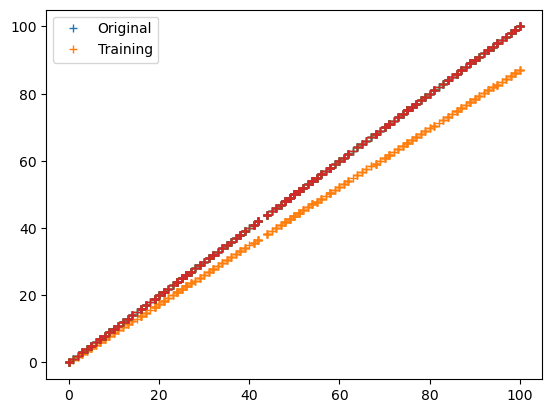

Iteration = 6, Loss = 12.36489820730554


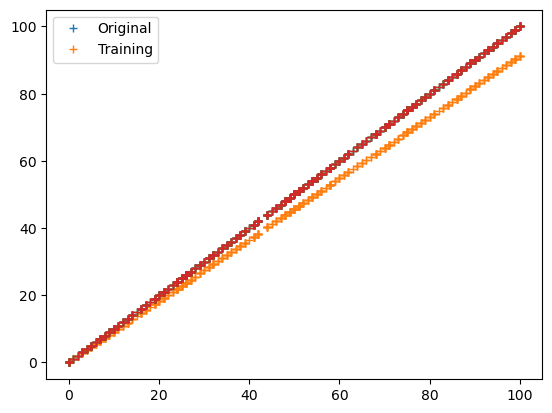

Iteration = 7, Loss = 5.609983075791791


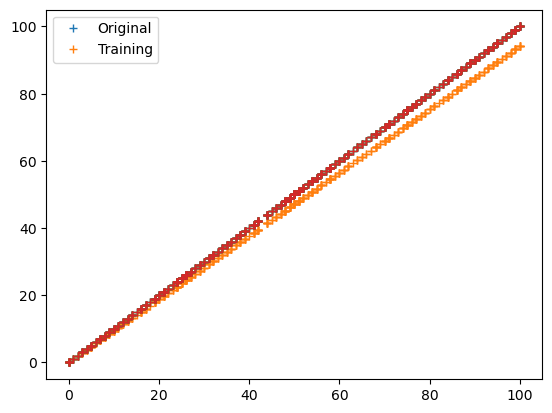

Iteration = 8, Loss = 2.54527059784283


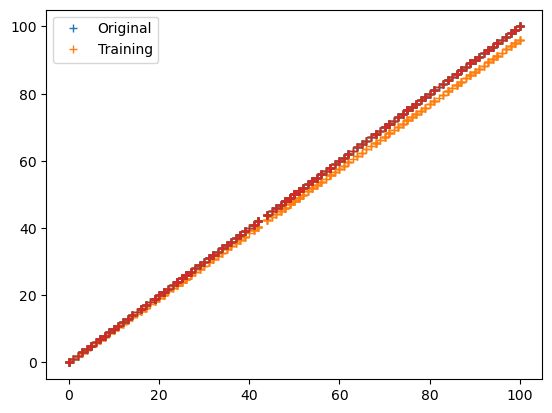

Iteration = 9, Loss = 1.154807151236764


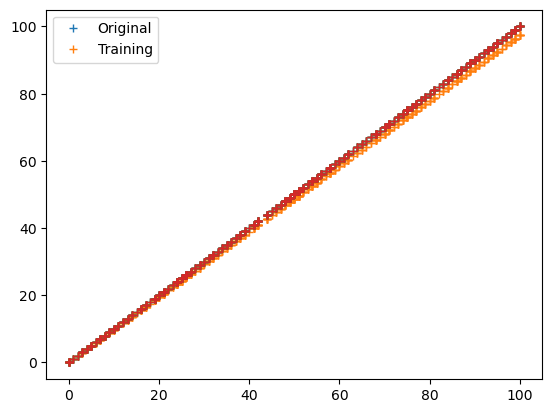

Iteration = 10, Loss = 0.523952344618269


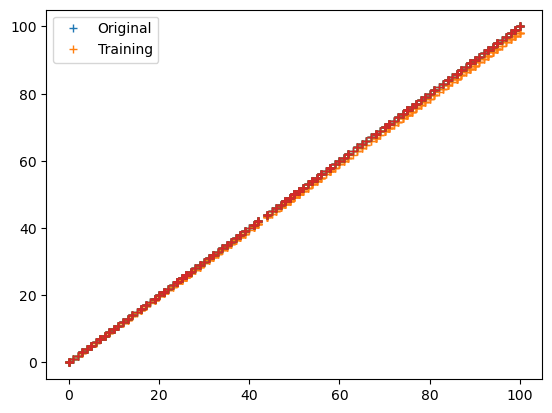

Iteration = 11, Loss = 0.23773281933600082


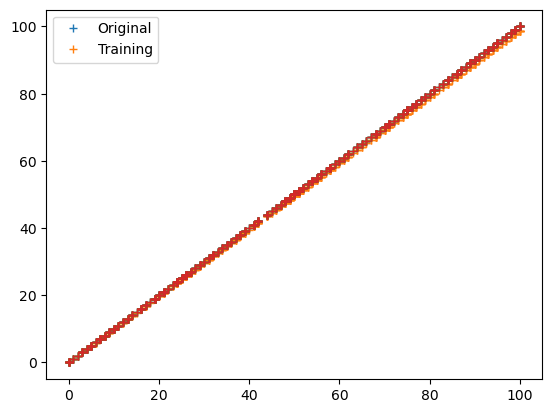

Iteration = 12, Loss = 0.10787470292825382


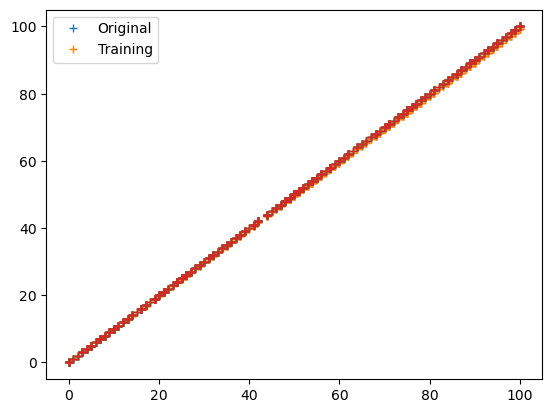

Iteration = 13, Loss = 0.04895793091926712


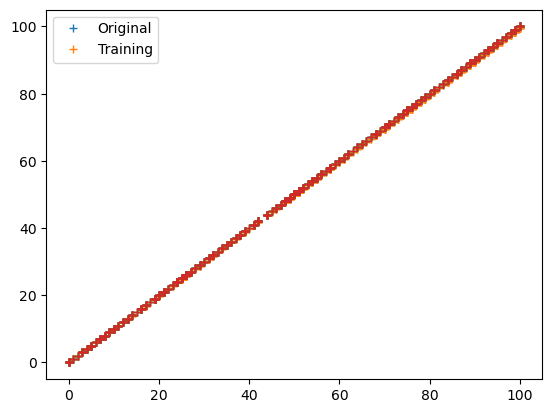

Iteration = 14, Loss = 0.02222732544158685


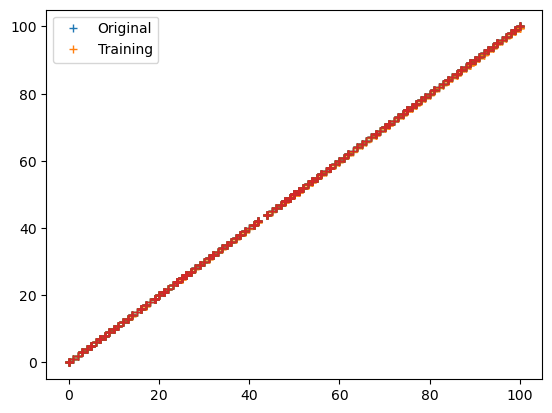

Iteration = 15, Loss = 0.01009961936992329


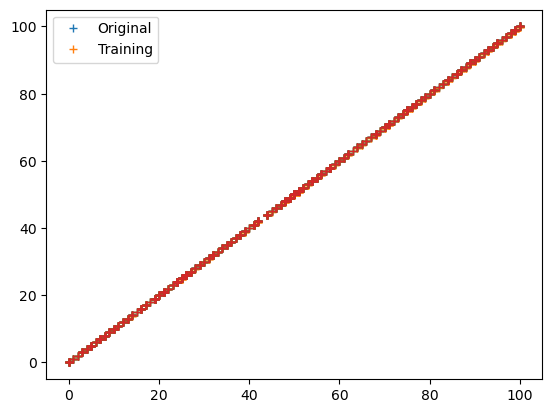

Iteration = 16, Loss = 0.004597264933581198


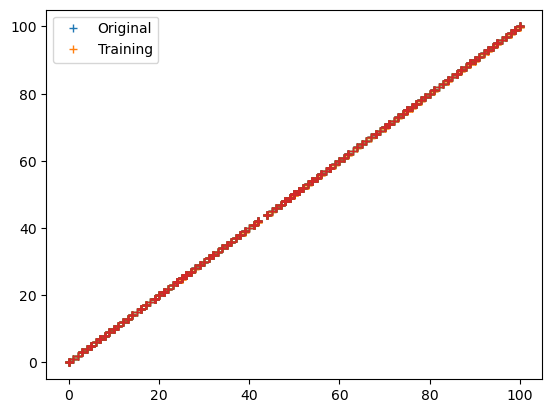

Iteration = 17, Loss = 0.0021008398727357484


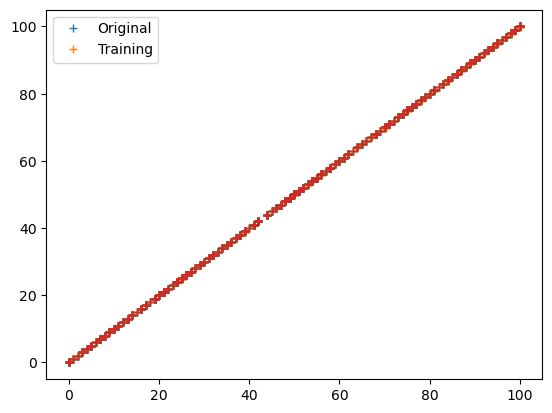

Iteration = 18, Loss = 0.0009682082990823347


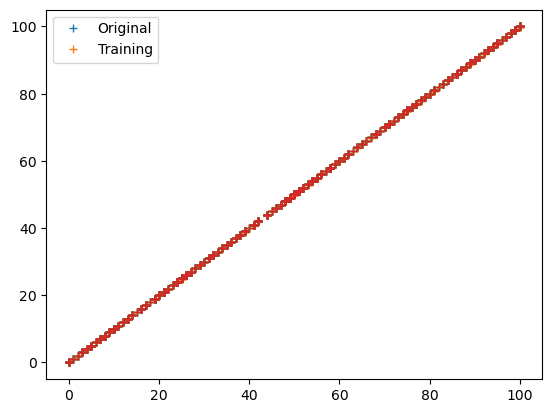

Iteration = 19, Loss = 0.0004543313411999528


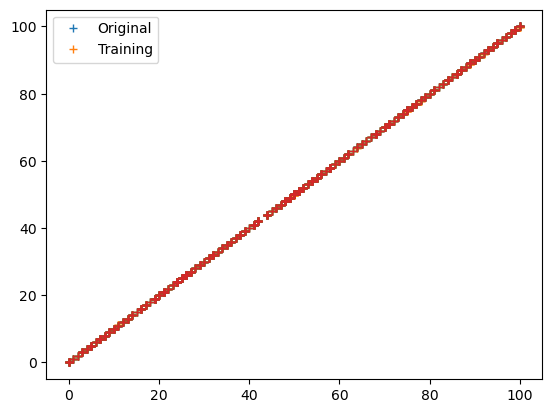

Iteration = 20, Loss = 0.00022118403788933715


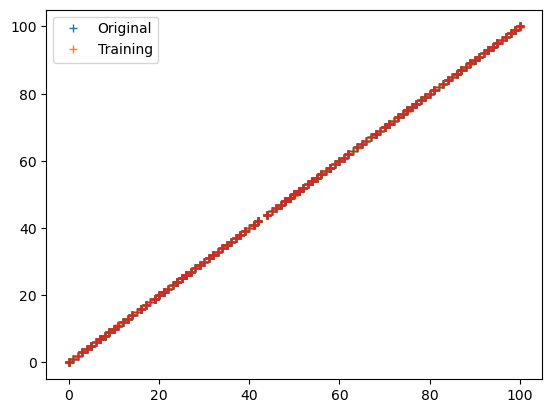

In [21]:
parameters, loss = train(train_input, train_output, 0.0001, 20)